<a href="https://colab.research.google.com/github/LEEGWONSEOK/CSAI_assignment/blob/main/%5B%EA%B7%B9%EB%9D%BD%5D_n214a_%EC%9D%B4%EA%B6%8C%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **01**

In [ ]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

In [ ]:
df.drop(columns=['id'], inplace=True)   # "id" column drop

def how_old(day):
  return day//365 + 1

df['age'] = df['age'].apply(how_old)


df.head(10)
#df.shape    # (70000, 12)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,61,1,151,67.0,120,80,2,2,0,0,0,0
6,61,1,157,93.0,130,80,3,1,0,0,1,0
7,62,2,178,95.0,130,90,3,3,0,0,1,1
8,49,1,158,71.0,110,70,1,1,0,0,1,0
9,55,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
df.isnull().sum()   # missing value check!
# missing value가 없는 것으로 판단

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df = df.drop_duplicates()  # remove duplicate values
df.shape[0]    # (69976, 12)

# 과제폼 : 69976 / 66792?

66792

### **02**

In [ ]:
## module
from sklearn.model_selection import train_test_split

## split train & test (in df)
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=2)
print("train shape : ", train.shape)
print("test shape : ", test.shape)
print("check : ",train.shape[0] + test.shape[0])

train shape :  (53433, 12)
test shape :  (13359, 12)
check :  66792


In [ ]:
## split train & validation (in train)
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=2)
print("train shape : ", train.shape)
print("validation shape : ", val.shape)
print("check : ",train.shape[0] + val.shape[0])

# 과제폼 : 11196  / 10687

train shape :  (42746, 12)
validation shape :  (10687, 12)
check :  53433


### **03**

In [ ]:
## setting 기준모델
target = 'cardio'

y_train = train[target]
y_train.value_counts(normalize=True)

1    0.512656
0    0.487344
Name: cardio, dtype: float64

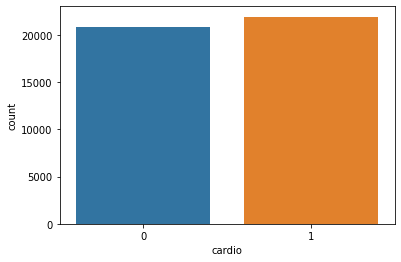

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x=y_train);

In [ ]:
major = y_train.mode()[0]

y_pred = [major] * len(y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5126561549618678


In [ ]:
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.509029662206419


In [ ]:
train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000,42746.000000
mean,53.840968,1.356057,164.362373,74.480072,128.990596,97.446053,1.384902,1.235952,0.091985,0.054953,0.798648,0.512656
std,6.814946,0.478838,8.329276,14.484460,146.032625,194.443029,0.691140,0.581144,0.289008,0.227890,0.401015,0.499846
min,30.000000,1.000000,57.000000,10.000000,-140.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,181.000000,14020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42746 entries, 37016 to 68360
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          42746 non-null  int64  
 1   gender       42746 non-null  int64  
 2   height       42746 non-null  int64  
 3   weight       42746 non-null  float64
 4   ap_hi        42746 non-null  int64  
 5   ap_lo        42746 non-null  int64  
 6   cholesterol  42746 non-null  int64  
 7   gluc         42746 non-null  int64  
 8   smoke        42746 non-null  int64  
 9   alco         42746 non-null  int64  
 10  active       42746 non-null  int64  
 11  cardio       42746 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.5 MB


In [ ]:
## 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression

features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
X_train = train[features]
X_val = val[features]

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('검증세트 정확도', logistic.score(X_val, y_val))

검증세트 정확도 0.705623654907832


In [ ]:
pred = logistic.predict(X_val)
pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
print(features)
print(logistic.coef_)

['age', 'height', 'weight', 'ap_hi', 'ap_lo']
[[ 0.05679206 -0.00966562  0.01735148  0.0362938   0.00046813]]


`age` : 나이가 많을수록 심혈관 질환이 있을 확률이 높다

`height` : 키가 작을수록 심혈관 질환이 있을 확률이 높다

`weight` : 몸이 무거울수록 심혈관 질환이 있을 확률이 높다

`ap_hi` : 수축기 혈압이 높을수록 심혈관 질환이 있을 확률이 높다

`ap_lo` : 이완기 혈압이 높을수록 심혈관 질환이 있을 확률이 높다

### **04**

In [ ]:
## gender onehotencoding
### 이곳에서 과제를 진행해 주세요 ###

### **05**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

## 🔥 도전과제: